In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
processeddata=pd.read_csv(r'C:\\Users\\rames\\OneDrive\\Desktop\\namma\\DA_proj\\preprocessed_wosq.csv', index_col='Id')
processeddata

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_654683e33,0.000000,0,6,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,38,4
ID_389eb5f20,0.000000,0,6,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,4
ID_5bef9b553,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,24,2
ID_55199c2f3,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,23,2
ID_079963679,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,1,2
ID_99c9bcea5,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,3,2
ID_ca701e058,24576.173137,0,4,0,1,1,0,0,0,2,...,0,1,0,0,0,0,0,1,50,2
ID_fe8c32eba,24576.173137,0,4,0,1,1,0,0,0,2,...,0,1,0,0,0,0,0,1,16,2
ID_1e320689c,0.000000,0,5,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,59,3


In [3]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column

In [4]:
class_names=processeddata.Target.unique()
a=processeddata
class_names=list(class_names)
col1=list(processeddata.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
col1=list(filter(lambda a: a not in data_notnum , col1))
print(len(col1))
col1=list(set(col1)-set(['Target']))
print(len(col1))
X_sq = processeddata[col1] # features for dataset which includes squared parameters
y_sq = processeddata.Target #target

130
129


In [5]:
#For selecting the most appopriate columns for our model we will perform two operations.

#Random Forest for feature importance
#Eliminate highly correlated values
clf = RandomForestClassifier()
clf.fit(X_sq , y_sq)

imp = clf.feature_importances_
name = np.array(X_sq.columns.values.tolist())

df_imp = pd.DataFrame({'feature':name, 'importance':imp})
df_imp = df_imp.sort_values(by='importance', ascending=False)

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


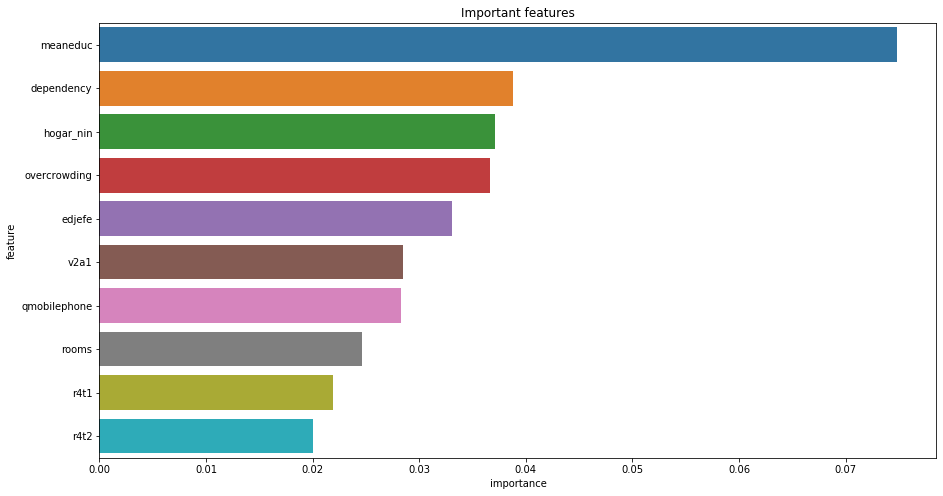

In [6]:
plt.figure(figsize=(15,8))

sns.barplot(df_imp.loc[(df_imp['importance'] > 0.02),'importance'], y = df_imp.loc[(df_imp['importance'] > 0.02),'feature'])
plt.title('Important features')
plt.show()


In [7]:
important_cols = df_imp['feature']
x_ = X_sq[important_cols[0:10]]

# getting top 10 columns and target to compare with mean of non vulnerable data points
imp=important_cols[0:10]
imp=list(map(lambda x:str(x),imp))
imp.append('Target')

In [8]:
a1= processeddata[imp]
a1= a1.loc[a['Target'] == 4]
a1=pd.DataFrame(a1.mean())
a1=a1.rename(columns = {0: "Non vulnerable"}) 
a1

,Non vulnerable
meaneduc,10.369458
dependency,0.912887
hogar_nin,1.075783
overcrowding,1.427018
edjefe,6.019320
v2a1,66060.203111
qmobilephone,3.020486
rooms,5.205363
r4t1,0.562292
r4t2,3.234677


In [9]:
b=processeddata[imp]
b=b.loc[b['Target']==3]
b=pd.DataFrame(b.mean())
b=b.rename(columns = {0: "Vulnerable"}) 
b

,Vulnerable
meaneduc,7.633402
dependency,1.347898
hogar_nin,1.692875
overcrowding,1.753986
edjefe,4.461916
v2a1,28364.449770
qmobilephone,2.788698
rooms,4.759214
r4t1,0.845209
r4t2,3.459459


In [10]:
c=processeddata[imp]
c=c.loc[c['Target']==2]
c=pd.DataFrame(c.mean())
c=c.rename(columns = {0: "Moderate poverty"}) 
c

,Moderate poverty
meaneduc,7.303049
dependency,1.610291
hogar_nin,2.000642
overcrowding,1.959275
edjefe,3.455712
v2a1,24576.173137
qmobilephone,2.443517
rooms,4.462131
r4t1,1.178434
r4t2,3.181001


In [11]:
d=processeddata[imp]
d=d.loc[d['Target']==1]
d=pd.DataFrame(d.mean())
d=d.rename(columns = {0: "Extreme Poverty"}) 
d

,Extreme Poverty
meaneduc,6.804587
dependency,1.745047
hogar_nin,2.325581
overcrowding,2.042162
edjefe,2.245478
v2a1,21379.110592
qmobilephone,2.090439
rooms,4.320413
r4t1,1.626615
r4t2,2.817829


In [14]:
res=  pd.concat([a1, b,c,d], axis=1, sort=False)

In [15]:
res

,Non vulnerable,Vulnerable,Moderate poverty,Extreme Poverty
meaneduc,10.369458,7.633402,7.303049,6.804587
dependency,0.912887,1.347898,1.610291,1.745047
hogar_nin,1.075783,1.692875,2.000642,2.325581
overcrowding,1.427018,1.753986,1.959275,2.042162
edjefe,6.019320,4.461916,3.455712,2.245478
v2a1,66060.203111,28364.449770,24576.173137,21379.110592
qmobilephone,3.020486,2.788698,2.443517,2.090439
rooms,5.205363,4.759214,4.462131,4.320413
r4t1,0.562292,0.845209,1.178434,1.626615
r4t2,3.234677,3.459459,3.181001,2.817829


In [18]:
res=res.div(res.sum(axis=1), axis=0)

In [19]:
res

,Non vulnerable,Vulnerable,Moderate poverty,Extreme Poverty
meaneduc,0.322930,0.237723,0.227435,0.211912
dependency,0.162547,0.240005,0.286726,0.310721
hogar_nin,0.151628,0.238605,0.281984,0.327783
overcrowding,0.198682,0.244205,0.272787,0.284327
edjefe,0.371966,0.275726,0.213547,0.138760
v2a1,0.470582,0.202055,0.175069,0.152295
qmobilephone,0.292028,0.269618,0.236245,0.202109
rooms,0.277662,0.253864,0.238017,0.230457
r4t1,0.133480,0.200641,0.279744,0.386136
r4t2,0.254840,0.272549,0.250611,0.221999


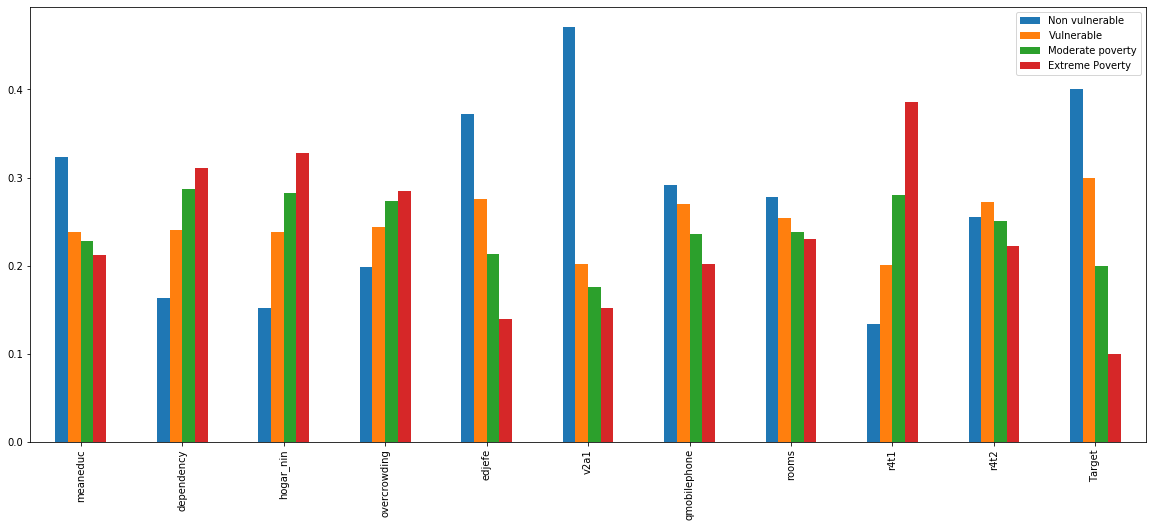

In [36]:

w = 0.5
res.plot(kind='bar', width=w, figsize=(20,8))


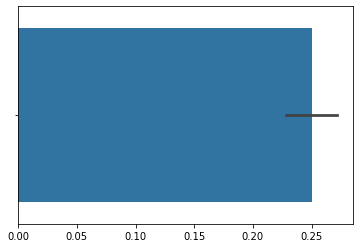